In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("salesdatafile.csv")
df.head(15)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [26]:
df.shape
#200 linhas e 4 colunas com os dados que serão analisados

(200, 4)

In [27]:
#Informações sobre os tipos de dados armazenados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [28]:
#Estatistica
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


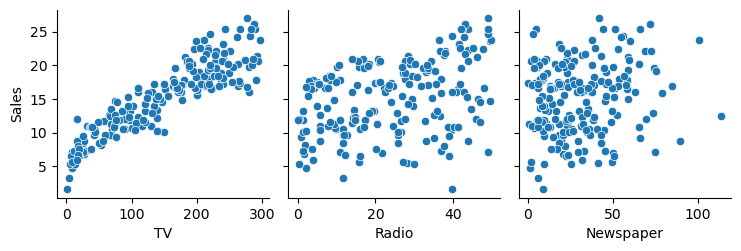

In [29]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], kind='scatter')
#Cria 3 graficos de dispersão eixo x (TV, Radio, Jormal), comparando ao eixo Y Vendas
#Tipo de gráfico dispersão

<Axes: >

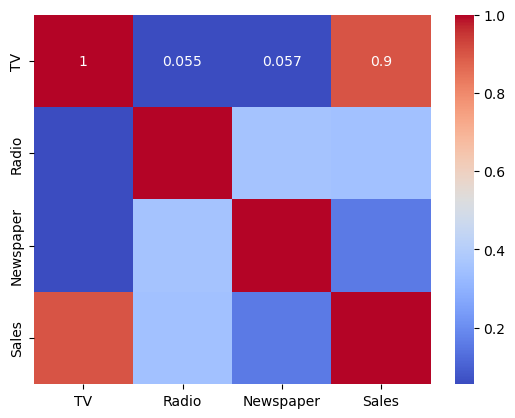

In [30]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
#Heatmap da MATRIZ DE CORRELAÇãO

In [31]:
#Features são os dados que temos
X = df.drop(columns='Sales')
#O drop tira a sales do df, sobrando (TV,Radio e Jornal)
#Evidente que se vamos prever as vendas temos que retiar ela
#Target Vendas
Y = df['Sales']


In [32]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [33]:
#Prevendo o modelo
Y_pred = model.predict(X_test)
#Avaliando o modelo vai de 0 a 1 quanto mais perto do 1 mais otimizado o modelo de machine learning está sendo aplicado
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coeficiente de determinação:", round(r2 * 100, 2), "%")

Mean Squared Error: 2.907756910271091
R-squared: 0.9059011844150826
Coeficiente de determinação: 90.59 %


In [34]:
Y_pred


array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [35]:
model.intercept_
#termo independente da reta (valor do modelo quando todas as variaveis dependentes são iguais a 0)
#y = mx + b

4.714126402214134

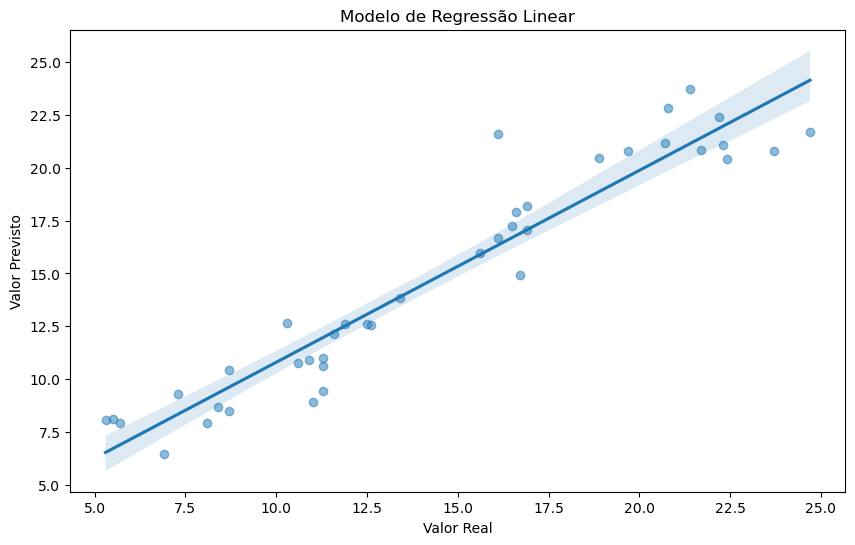

In [36]:
# Plotar o modelo de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.5})
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Modelo de Regressão Linear')
plt.show()